In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire
np.random.seed(4)

### Clustering with the Iris Dataset
#### Using this lesson as a guide, perform clustering on the iris dataset.
#### a. Choose features other than the ones used in the lesson.

In [2]:
iris = acquire.get_iris_data()

In [3]:
iris = acquire.prep_iris(iris)

In [4]:
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,0,0
1,2,4.9,3.0,1.4,0.2,setosa,0,0
2,3,4.7,3.2,1.3,0.2,setosa,0,0
3,4,4.6,3.1,1.5,0.2,setosa,0,0
4,5,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,0,1
146,147,6.3,2.5,5.0,1.9,virginica,0,1
147,148,6.5,3.0,5.2,2.0,virginica,0,1
148,149,6.2,3.4,5.4,2.3,virginica,0,1


In [5]:
# Create new features for the area of the sepal and petal
iris['petal_area'] = iris.petal_length * iris.petal_width
iris['sepal_area'] = iris.sepal_width * iris.sepal_length

In [6]:
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,petal_area,sepal_area
0,1,5.1,3.5,1.4,0.2,setosa,0,0,0.28,17.85
1,2,4.9,3.0,1.4,0.2,setosa,0,0,0.28,14.70
2,3,4.7,3.2,1.3,0.2,setosa,0,0,0.26,15.04
3,4,4.6,3.1,1.5,0.2,setosa,0,0,0.30,14.26
4,5,5.0,3.6,1.4,0.2,setosa,0,0,0.28,18.00
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,0,1,11.96,20.10
146,147,6.3,2.5,5.0,1.9,virginica,0,1,9.50,15.75
147,148,6.5,3.0,5.2,2.0,virginica,0,1,10.40,19.50
148,149,6.2,3.4,5.4,2.3,virginica,0,1,12.42,21.08


In [7]:
train, validate, test = acquire.split_data(iris)

In [8]:
train.shape, validate.shape, test.shape

((84, 10), (36, 10), (30, 10))

(array([ 4., 13., 31., 38., 23., 28.,  9.,  2.,  0.,  2.]),
 array([10.   , 12.002, 14.004, 16.006, 18.008, 20.01 , 22.012, 24.014,
        26.016, 28.018, 30.02 ]),
 <BarContainer object of 10 artists>)

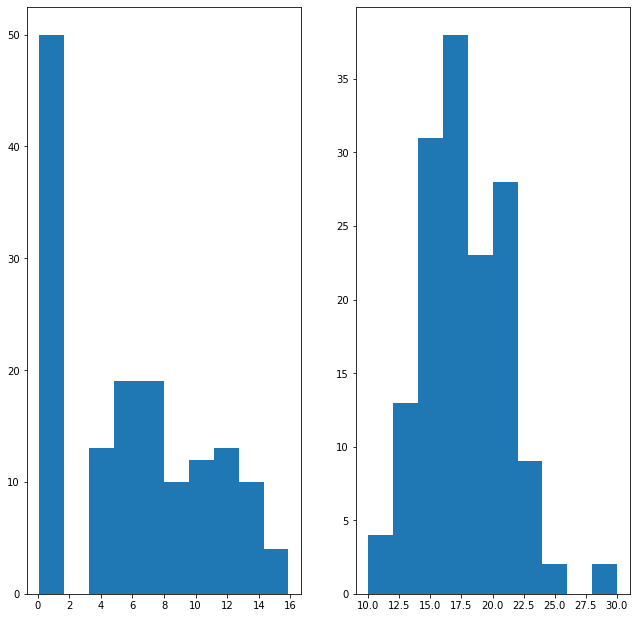

In [10]:
# Visualize the distribution of petal area and sepal area

plt.figure(figsize = (10.8,10.8))
plt.subplot(121)
plt.hist(iris.petal_area)

plt.subplot(122)
plt.hist(iris.sepal_area)

In [11]:
# Use petal/sepal area as attributes

X = iris[['petal_area', 'sepal_area']]

In [15]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [16]:
X_scaled.head()

,petal_area,sepal_area
0,-1.174041,0.008098
1,-1.174041,-0.932024
2,-1.178299,-0.830551
3,-1.169783,-1.063343
4,-1.174041,0.052866


In [27]:
# sklearn implementation of KMeans

# Define the thing:
kmeans = KMeans(n_clusters=3, random_state = 123)
# Fit the thing:
kmeans.fit(X_scaled)
# Use (predict using) the thing:
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [28]:
# Create a new column that holds the predicted clustered values
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [29]:
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,petal_area,sepal_area,cluster
0,1,5.1,3.5,1.4,0.2,setosa,0,0,0.28,17.85,2
1,2,4.9,3.0,1.4,0.2,setosa,0,0,0.28,14.70,2
2,3,4.7,3.2,1.3,0.2,setosa,0,0,0.26,15.04,2
3,4,4.6,3.1,1.5,0.2,setosa,0,0,0.30,14.26,2
4,5,5.0,3.6,1.4,0.2,setosa,0,0,0.28,18.00,2
...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,0,1,11.96,20.10,1
146,147,6.3,2.5,5.0,1.9,virginica,0,1,9.50,15.75,0
147,148,6.5,3.0,5.2,2.0,virginica,0,1,10.40,19.50,1
148,149,6.2,3.4,5.4,2.3,virginica,0,1,12.42,21.08,1


In [30]:
# View the values of the Cluster Centers aka Centroids. The output will be scaled.
kmeans.cluster_centers_

array([[ 0.12706816, -0.65997016],
       [ 1.14581844,  1.03442395],
       [-1.15592136, -0.12657062]])

In [31]:
# Make a dataframe of the centroids.
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_area,sepal_area
0,0.127068,-0.659970
1,1.145818,1.034424
2,-1.155921,-0.126571


In [33]:
# Centroids for unscaled data:
centroids = iris.groupby('cluster')['sepal_area','petal_area'].mean()
centroids

,sepal_area,petal_area
cluster,,
0,15.611552,6.390862
1,21.288837,11.175581
2,17.398776,0.365102


In [34]:
# View the KMeans labels (same as from predict)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

#### b. Visualize the results of your clustering.


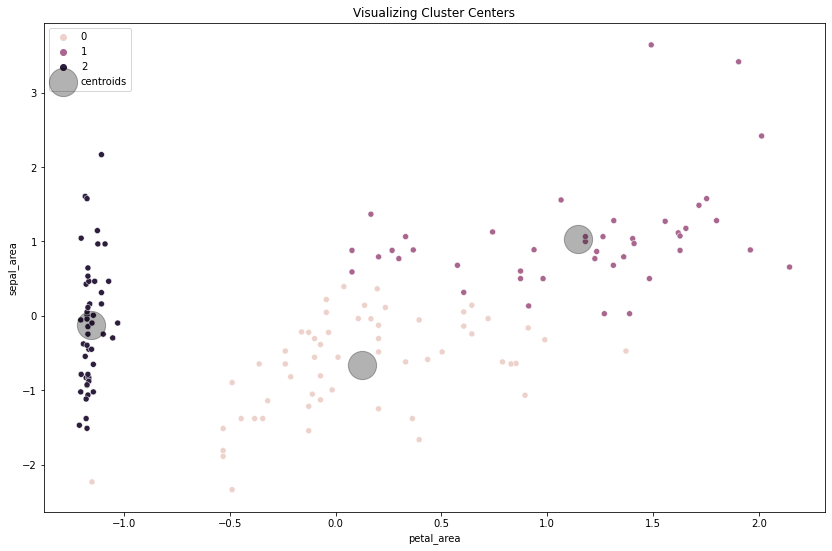

In [35]:
# lets visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14,9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_area', y='sepal_area', data = X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_area', y='sepal_area',
                             ax = plt.gca(),
                             s = 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend()

In [36]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,petal_area,sepal_area,cluster
0,1,5.1,3.5,1.4,0.2,setosa,0,0,0.28,17.85,cluster_2
1,2,4.9,3.0,1.4,0.2,setosa,0,0,0.28,14.70,cluster_2
2,3,4.7,3.2,1.3,0.2,setosa,0,0,0.26,15.04,cluster_2
3,4,4.6,3.1,1.5,0.2,setosa,0,0,0.30,14.26,cluster_2
4,5,5.0,3.6,1.4,0.2,setosa,0,0,0.28,18.00,cluster_2


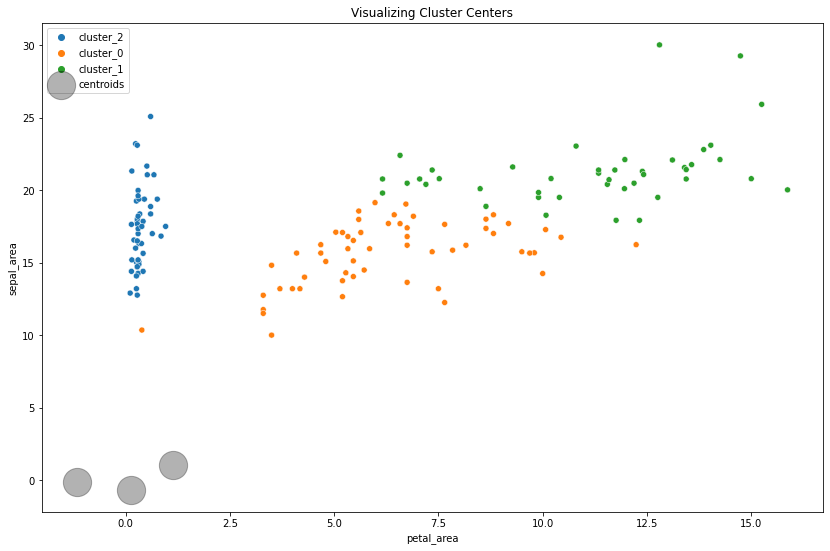

In [37]:
# lets visualize the clusters along with the centers on unscaled data.
plt.figure(figsize=(14,9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_area', y='sepal_area', data = iris, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_area', y='sepal_area',
                             ax = plt.gca(),
                             s = 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend()

#### c. Use the elbow method to visually select a good value for k.

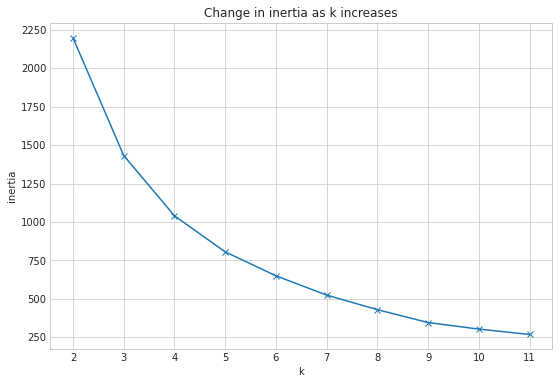

In [39]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2,12)}).plot(marker='x')
    plt.xticks(range(2,12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### d. Repeat the clustering, this time with 3 different features.

In [40]:
X = iris[['petal_area', 'sepal_area', 'sepal_width']]

In [41]:
# Scale the X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [ ]:
# sklearn implementation of KMeans

# Define the thing:
kmeans = KMeans(n_clusters=3, random_state = 123)
# Fit the thing:
kmeans.fit(X_scaled)
# Use (predict using) the thing:
kmeans.predict(X_scaled)